In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [6]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving log 2 transfrmed parkison - Copy.csv to log 2 transfrmed parkison - Copy (2).csv


In [8]:
df.dropna(inplace = True)
print(df.shape)

(3280, 17)


In [9]:
df


,Gene names,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2,Alpha _day_30_1,Alpha _day_30_2
1,dnc,-1.834030194,-2.350706453,-1.820310614,-2.124628824,-1.187871481,#VALUE!,-2.388733175,-2.078198091,#VALUE!,-2.181803871,-1.258321614,-1.648778758,-1.381122377,-2.117787378,-2.122365674,-2.448193627
3,Marf,-1.037976699,-1.583549352,-1.725899393,-2.04299178,-0.80404773,-1.256528117,-1.649095461,-1.301017029,#VALUE!,-1.980796266,-0.954640909,-1.284686459,-1.517296252,-2.158815851,-0.537612575,-0.992833209
4,Rh4,0.648925559,-1.958981361,-3.534980511,0.174406419,#VALUE!,#VALUE!,-0.967447724,-1.357825241,-0.627471303,-1.93076529,#VALUE!,-0.369930078,#VALUE!,#VALUE!,#VALUE!,-3.020691654
5,CG7766,-2.141971247,#VALUE!,-0.919178636,-2.198659207,-1.487904618,#VALUE!,-3.247559673,-2.18632756,#VALUE!,-1.903522231,#VALUE!,#VALUE!,-1.14053926,-1.298282398,-1.24615589,-1.916807059
6,Gycalpha99B,-2.070966521,#VALUE!,-1.9588131,-2.027498493,#VALUE!,#VALUE!,-1.821635918,-1.410313203,-2.970638997,-1.87228749,-0.978434993,-1.161427356,#VALUE!,-1.628653027,#VALUE!,-2.049486794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,Cyp6a23,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,#VALUE!,2.640482112,1.726395292,#VALUE!,1.243730004,0.537842721,0.771547572,0.571142829,0.71791217
4428,Mi-2,-1.819801206,-0.991771296,-1.260186453,#VALUE!,-1.258563216,-2.052715371,#VALUE!,#VALUE!,0.459851251,-0.911749832,-1.502259911,-2.145796843,-0.9770428,-0.58255521,-1.687056072,-0.233006324
4429,Usp7,-2.645119101,-1.308858945,-2.134477041,-1.697967615,-1.877261028,-0.962238264,-1.931535549,-1.724611464,0.093154488,-1.275332268,-1.677010472,-2.070542262,-1.961788598,-1.95338322,-2.385186521,-1.118037868
4430,Aats-his,-1.36434775,-1.976304631,-1.202970416,-1.173840012,-1.890144696,-2.204898042,-1.420472256,-1.337630412,2.648833548,-1.484953701,-1.323804819,-1.671393283,-0.775441042,-0.94922668,-1.156723612,-1.075398395


In [11]:
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
# Correct the numeric columns based on the actual DataFrame columns
numeric_columns = [col for col in df.columns if col != 'Gene names']
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene names']  # Optional: set gene names as column headers

In [13]:
# Sample names corresponding to the transposed rows
sample_names = transposed_data.index.tolist()
# Clean up sample names for display by removing leading/trailing spaces
sample_names = [name.strip() for name in sample_names]

labels = []
for name in sample_names:
    if 'A30P' in name:
        labels.append('A30P')
    elif 'A53T' in name:
        labels.append('A53T')
    elif 'Alpha _' in name: # 'Alpha _' is assumed to be WT based on original data
        labels.append('WT')
    else:
        labels.append('Unknown') # Handle any other cases if they exist

# You can verify the generated labels
# print(labels)
# print(len(labels))

In [14]:
# STEP 7: Standardize the data
# Convert all columns of transposed_data to numeric, coercing any non-numeric values to NaN
transposed_data_numeric = transposed_data.apply(pd.to_numeric, errors='coerce')

# Drop columns (genes) that contain NaN values introduced by the coercion
# This ensures that only purely numeric data is passed to StandardScaler, while retaining all samples.
transposed_data_numeric.dropna(axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data_numeric)

In [15]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [16]:
# Sample names corresponding to the transposed rows
sample_names = transposed_data.index.tolist()
# Clean up sample names for display by removing leading/trailing spaces
sample_names = [name.strip() for name in sample_names]

In [17]:
# Define new color map for the three groups
color_map = {'A30P': '#A52A2A', 'A53T': '#4169E1', 'WT': '#228B22'}  # Brown, Royal Blue, Forest Green

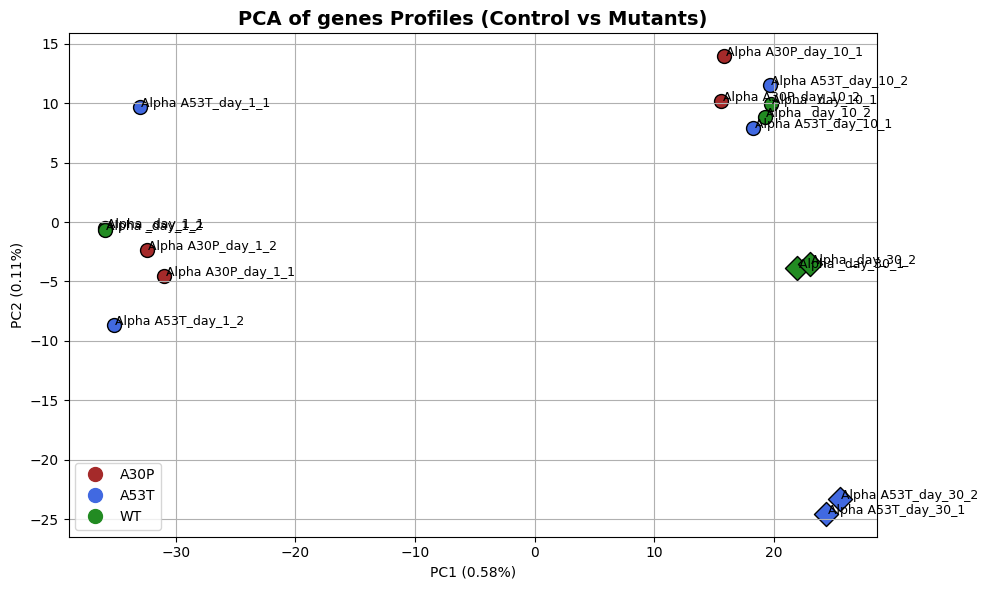

In [18]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    is_day_30 = '_day_30' in sample_names[i]
    is_a53t_or_wt = (label == 'A53T' or label == 'WT')

    marker_style = 'o'
    point_size = 100
    text_weight = 'normal'

    if is_day_30 and is_a53t_or_wt:
        marker_style = 'D'  # Diamond marker for day 30 A53T/WT
        point_size = 150    # Larger size for emphasis
        text_weight = 'normal'

    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=point_size,
        marker=marker_style,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9,
        weight=text_weight
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

# Add a specific legend handle for the 'Day 30' points if needed, or rely on text labels
# For clarity, let's just make sure existing legend handles are correct.

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (Control vs Mutants)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()